In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

In [3]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

train_data.head() # display first 10 rows
test_data.apply(lambda x: sum(x.isnull()))  #to count the number of rows with missing values in a pandas DataFrame  //Finding count of distinct elements in DataFrame in each column

test_data['Item_Fat_Content'].unique()

# combining Item_Fat_Content misspelled
train_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

# creating new column num_years
train_data['num_years'] = train_data['Outlet_Establishment_Year'].apply(lambda x: 2013 - x) 
test_data['num_years'] = test_data['Outlet_Establishment_Year'].apply(lambda x: 2013 - x)
train_data['Item_Type'].unique()  
full_data = [train_data, test_data]
# filling null values
for data in full_data:
    data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace = True)
    data['Outlet_Size'].fillna('Medium',inplace = True)
col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
# handling catagorical variables
train_datar = pd.get_dummies(train_data, columns = col, drop_first = True)
test_datar = pd.get_dummies(test_data, columns = col,drop_first = True)
feat_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'num_years',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']

In [4]:
X = train_datar[feat_cols]
y = train_datar['Item_Outlet_Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)

In [5]:

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
print(regressor.intercept_)
print(regressor.coef_)

369.98316325787414
[-1.54814382e+00 -3.66015066e+02  1.55481942e+01 -4.41244091e+01
  3.35482151e+01 -6.05163082e+01 -9.18259198e-01  1.72049916e+01
 -1.17688759e+02 -6.78248439e+01 -1.11561361e+01 -1.38970014e+01
 -4.93453362e+01 -6.57961646e+01 -2.04703488e+01 -4.04276503e+01
  1.80359718e+02 -2.61092381e+01 -7.58745459e+01  7.05044404e+01
 -9.63625632e+02 -8.96679662e+02 -2.48534094e+02 -4.84281851e+02
  1.41035296e+03  1.11228807e+03  3.89694547e+03]


In [7]:
y_pred = regressor.predict(X_test)
new_pred_series=pd.Series(y_pred)
df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': new_pred_series.values.flatten()})
print(df)

          Actual    Predicted
0      1426.1436  2458.963755
1      1201.7690  2537.684596
2      1836.2764  2245.806396
3      2410.8618  2445.007809
4      1549.9824  3104.809094
5      3169.2080  3656.096188
6      2036.6822  2941.961687
7       824.9262  1888.477285
8       378.1744  1150.998660
9      1573.9512  1812.231870
10     2474.7786  1893.165507
11      101.8674   293.517015
12      894.8352  1482.761033
13     1491.3920  2446.230021
14     1390.1904  2018.362935
15     1707.7770  1434.421275
16     1853.5872  2520.377840
17     2404.8696  2840.731936
18     5528.1374  3954.771674
19    12117.5600  5353.579882
20     4767.1280  3833.149659
21      185.7582  1298.259590
22      187.0898  1170.317729
23      772.3280  1672.810386
24     1324.2762  2130.652962
25     2036.6822  1707.609351
26     6574.7750  5579.993668
27     5285.1204  4107.248946
28      773.6596   958.195685
29     6615.3888  3875.040047
...          ...          ...
1675   2993.4368  2979.593274
1676    31

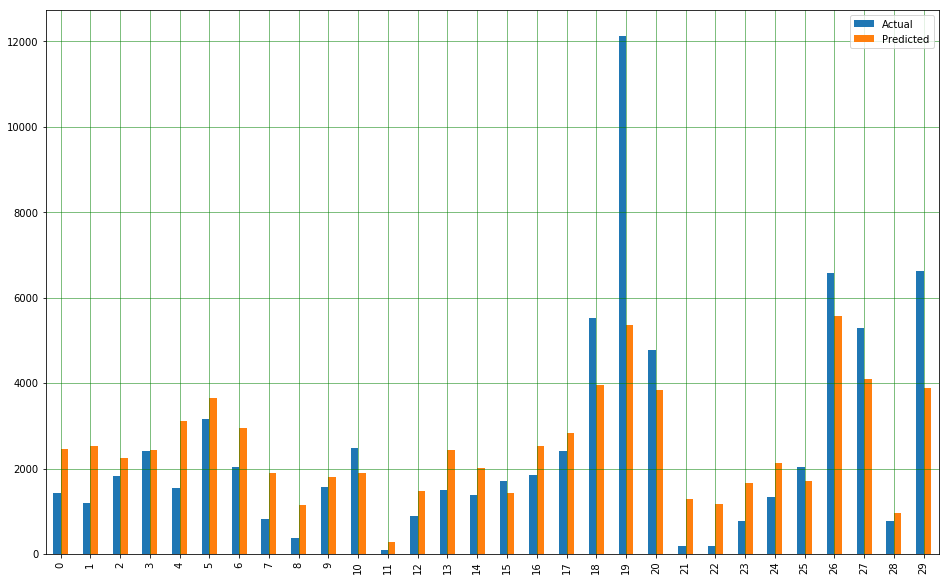

In [8]:
df1 = df.head(30)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [9]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 852.4329537092061
Mean Squared Error: 1281773.980313162
Root Mean Squared Error: 1132.154574390424
